

Veröffentlichung : https://arxiv.org/pdf/1908.10084.pdf

# Sentence Embeddings and Similarity

Pretrained Models

https://www.sbert.net/docs/pretrained_models.html

In [6]:
! pip install -U sentence-transformers
! pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 3.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [7]:
from sentence_transformers import SentenceTransformer, util

In [8]:
model = SentenceTransformer('all-MiniLM-L6-v2')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
sentences = ['the cat sits outside', 'the new movie is awesome', 'the new movie is really great', 'the dog bark on stangers']

In [10]:
embeddings = model.encode(sentences=sentences, convert_to_tensor=True)

In [11]:
for sent,embed in zip(sentences, embeddings):
  print("Sentence:", sent)
  print("Len(Embeddings:", len(embed))
  # print("Embeddings: ", embed)

Sentence: the cat sits outside
Len(Embeddings: 384
Sentence: the new movie is awesome
Len(Embeddings: 384
Sentence: the new movie is really great
Len(Embeddings: 384
Sentence: the dog bark on stangers
Len(Embeddings: 384


In [12]:
cosine_scores = util.cos_sim(embeddings, embeddings)

In [13]:
cosine_scores

tensor([[ 1.0000, -0.0247, -0.0258,  0.1578],
        [-0.0247,  1.0000,  0.9074,  0.0984],
        [-0.0258,  0.9074,  1.0000,  0.1001],
        [ 0.1578,  0.0984,  0.1001,  1.0000]], device='cuda:0')

In [14]:
sentences

['the cat sits outside',
 'the new movie is awesome',
 'the new movie is really great',
 'the dog bark on stangers']

In [15]:
paraphrases = util.paraphrase_mining(model, sentences)

In [16]:
for sim in paraphrases[0:10]:
  score, i, j = sim
  print(sentences[i], "<>" ,sentences[j], " --> ",score)

the new movie is awesome <> the new movie is really great  -->  0.9074223041534424
the cat sits outside <> the dog bark on stangers  -->  0.15776795148849487
the new movie is really great <> the dog bark on stangers  -->  0.10014540702104568
the new movie is awesome <> the dog bark on stangers  -->  0.09836854040622711
the cat sits outside <> the new movie is awesome  -->  -0.02468009851872921
the cat sits outside <> the new movie is really great  -->  -0.025751974433660507


# Semantic Search

Semantic search seeks to improve search accuracy by understanding the content of the search query. In contrast to traditional search engines which only find documents based on lexical matches, semantic search can also find synonyms.



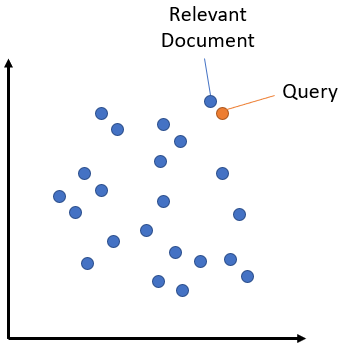

At search time, the query is embedded into the same vector space and the closest embeddings from your corpus are found. These entries should have a high semantic overlap with the query.

### Type of Semantic Search

- symmetric semantic search https://www.sbert.net/docs/pretrained_models.html#sentence-embedding-models
- asymmetric semantic search https://www.sbert.net/docs/pretrained-models/msmarco-v3.html

In [17]:
%pip install -U sentence-transformers

In [18]:
from sentence_transformers import SentenceTransformer, util
import torch

In [19]:
model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/383 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [20]:
import requests

In [21]:
response = requests.get('https://raw.githubusercontent.com/laxmimerit/machine-learning-dataset/master/text-dataset-for-machine-learning/sbert-corpus.txt')
corpus = response.text.split('\r\n')

response = requests.get('https://raw.githubusercontent.com/laxmimerit/machine-learning-dataset/master/text-dataset-for-machine-learning/sbert-queries.txt')
queries = response.text.split('\r\n')

In [22]:
print(corpus)

['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.', 'The girl is carrying a baby.', 'The baby is carried by the woman', 'A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.', 'A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.', 'A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']


In [23]:
print(queries)

['A man is eating pasta.', 'Someone in a gorilla costume is playing a set of drums.', 'A cheetah chases prey on across a field.']


In [24]:
corpus_embeddings = model.encode(corpus, convert_to_tensor=True)
queries_embeddings = model.encode(queries, convert_to_tensor=True)

In [ ]:
# corpus_embeddings[0]

In [ ]:
# lets normalize vectors for fast calculation
corpus_embeddings = util.normalize_embeddings(corpus_embeddings)
queries_embeddings = util.normalize_embeddings(queries_embeddings)

In [25]:
len(corpus_embeddings[0])

384

In [26]:
hits = util.semantic_search(queries_embeddings, corpus_embeddings, score_function=util.dot_score, top_k=3)

In [ ]:
hits

[[{'corpus_id': 2, 'score': 1.0},
  {'corpus_id': 0, 'score': 0.8384665846824646},
  {'corpus_id': 1, 'score': 0.7468276023864746}],
 [{'corpus_id': 8, 'score': 1.0},
  {'corpus_id': 7, 'score': 0.7612733840942383},
  {'corpus_id': 3, 'score': 0.3815288841724396}],
 [{'corpus_id': 10, 'score': 1.0000001192092896},
  {'corpus_id': 9, 'score': 0.8703994154930115},
  {'corpus_id': 6, 'score': 0.37411704659461975}]]

In [27]:
for query, hit in zip(queries, hits):
  for q_hit in hit:
    id = q_hit['corpus_id']
    score = q_hit['score']

    print(query, "<>", corpus[id], "-->", score)

  print()


A man is eating pasta. <> A man is eating pasta. --> 1.0
A man is eating pasta. <> A man is eating food. --> 0.8384665846824646
A man is eating pasta. <> A man is eating a piece of bread. --> 0.7468276023864746

Someone in a gorilla costume is playing a set of drums. <> Someone in a gorilla costume is playing a set of drums. --> 0.9999999403953552
Someone in a gorilla costume is playing a set of drums. <> A monkey is playing drums. --> 0.7612733840942383
Someone in a gorilla costume is playing a set of drums. <> The girl is carrying a baby. --> 0.3815288841724396

A cheetah chases prey on across a field. <> A cheetah chases prey on across a field. --> 1.0
A cheetah chases prey on across a field. <> A cheetah is running behind its prey. --> 0.8703992962837219
A cheetah chases prey on across a field. <> A man is riding a white horse on an enclosed ground. --> 0.37411704659461975



# Clustering

Sentence-Transformers can be used in different ways to perform clustering of small or large set of sentences.

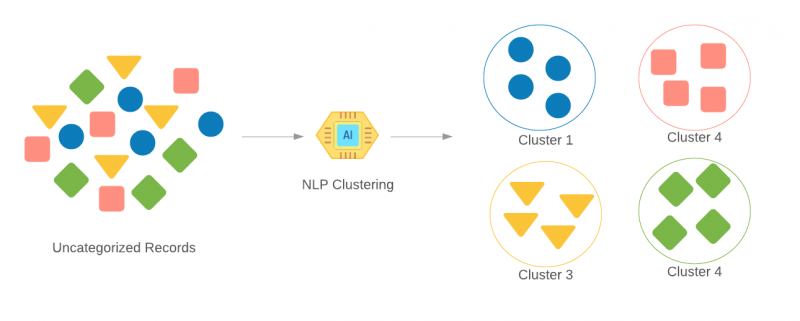

In fact, clusters are nothing more than groups that contain similar objects. Clustering is the process used for separating the objects into these groups.

### K-Mean Clustering

In [28]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

In [29]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [30]:
import requests
response = requests.get('https://raw.githubusercontent.com/laxmimerit/machine-learning-dataset/master/text-dataset-for-machine-learning/sbert-corpus.txt')
corpus = response.text.split('\r\n')

In [31]:
len(corpus), print(corpus)

['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.', 'The girl is carrying a baby.', 'The baby is carried by the woman', 'A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.', 'A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.', 'A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']


(11, None)

In [32]:
corpus_embeddings = model.encode(corpus)

In [38]:
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
cluster_assignment

array([1, 1, 1, 2, 2, 4, 4, 0, 0, 3, 3], dtype=int32)

In [40]:
clustered_sentences = [[] for i in range(num_clusters)]
clustered_sentences

[[], [], [], [], []]

In [41]:
for sentence_id, cluster_id in enumerate(cluster_assignment):
  clustered_sentences[cluster_id].append(corpus[sentence_id])

In [42]:
for i, cluster in enumerate(clustered_sentences):
  print("Cluster ", i+1)
  print(cluster)
  print()

Cluster  1
['A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.']

Cluster  2
['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.']

Cluster  3
['The girl is carrying a baby.', 'The baby is carried by the woman']

Cluster  4
['A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']

Cluster  5
['A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.']



### Agglomerative Clustering

It is a type of hierarchical clustering. The hierarchical clustering analysis is a method of cluster analysis that seeks to build a hierarchy of clusters i.e. tree-type structure based on the hierarchy.

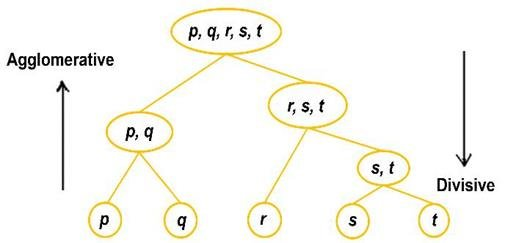

It is known as bottom-up approach or hierarchical agglomerative clustering (HAC)

In contrast to k-means, we can specify a threshold for the clustering.

It is useful if the number of clusters is unknown

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np


In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
import requests
response = requests.get('https://raw.githubusercontent.com/laxmimerit/machine-learning-dataset/master/text-dataset-for-machine-learning/sbert-corpus.txt')
corpus = response.text.split('\r\n')

In [ ]:
print(corpus)

['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.', 'The girl is carrying a baby.', 'The baby is carried by the woman', 'A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.', 'A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.', 'A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']


In [ ]:
corous_embeddings = model.encode(corpus)

In [ ]:
corpus_embeddings = corpus_embeddings/np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

In [ ]:
cluster_assignment

array([0, 0, 0, 4, 4, 1, 1, 2, 2, 3, 3])

In [ ]:
np.unique(cluster_assignment)

array([0, 1, 2, 3, 4])

In [ ]:
num_clusters = len(np.unique(cluster_assignment))
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
  clustered_sentences[cluster_id].append(corpus[sentence_id])


for i, cluster in enumerate(clustered_sentences):
  print("Cluster ", i+1)
  print(cluster)
  print()


Cluster  1
['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.']

Cluster  2
['A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.']

Cluster  3
['A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.']

Cluster  4
['A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']

Cluster  5
['The girl is carrying a baby.', 'The baby is carried by the woman']

